# **Backtracking**

The most brute force way to solve a problem is through exhaustive search. Generate all possibilities and then check each of them for a solution.

Imagine you had the letters a-z and were asked to generate strings of length n using the letters. There are 26^n possibilities, as each of the n letters could be a-z. You can imagine all possibilities as a tree. The root is the empty string "", and then all nodes have 26 children, with the path from the root representing the string being built. So if you started at the root and went to the "g" node, then from that node went to the "p" node, that would represent the string "gp". The depth of the tree is n, and the leaf nodes represent answers.

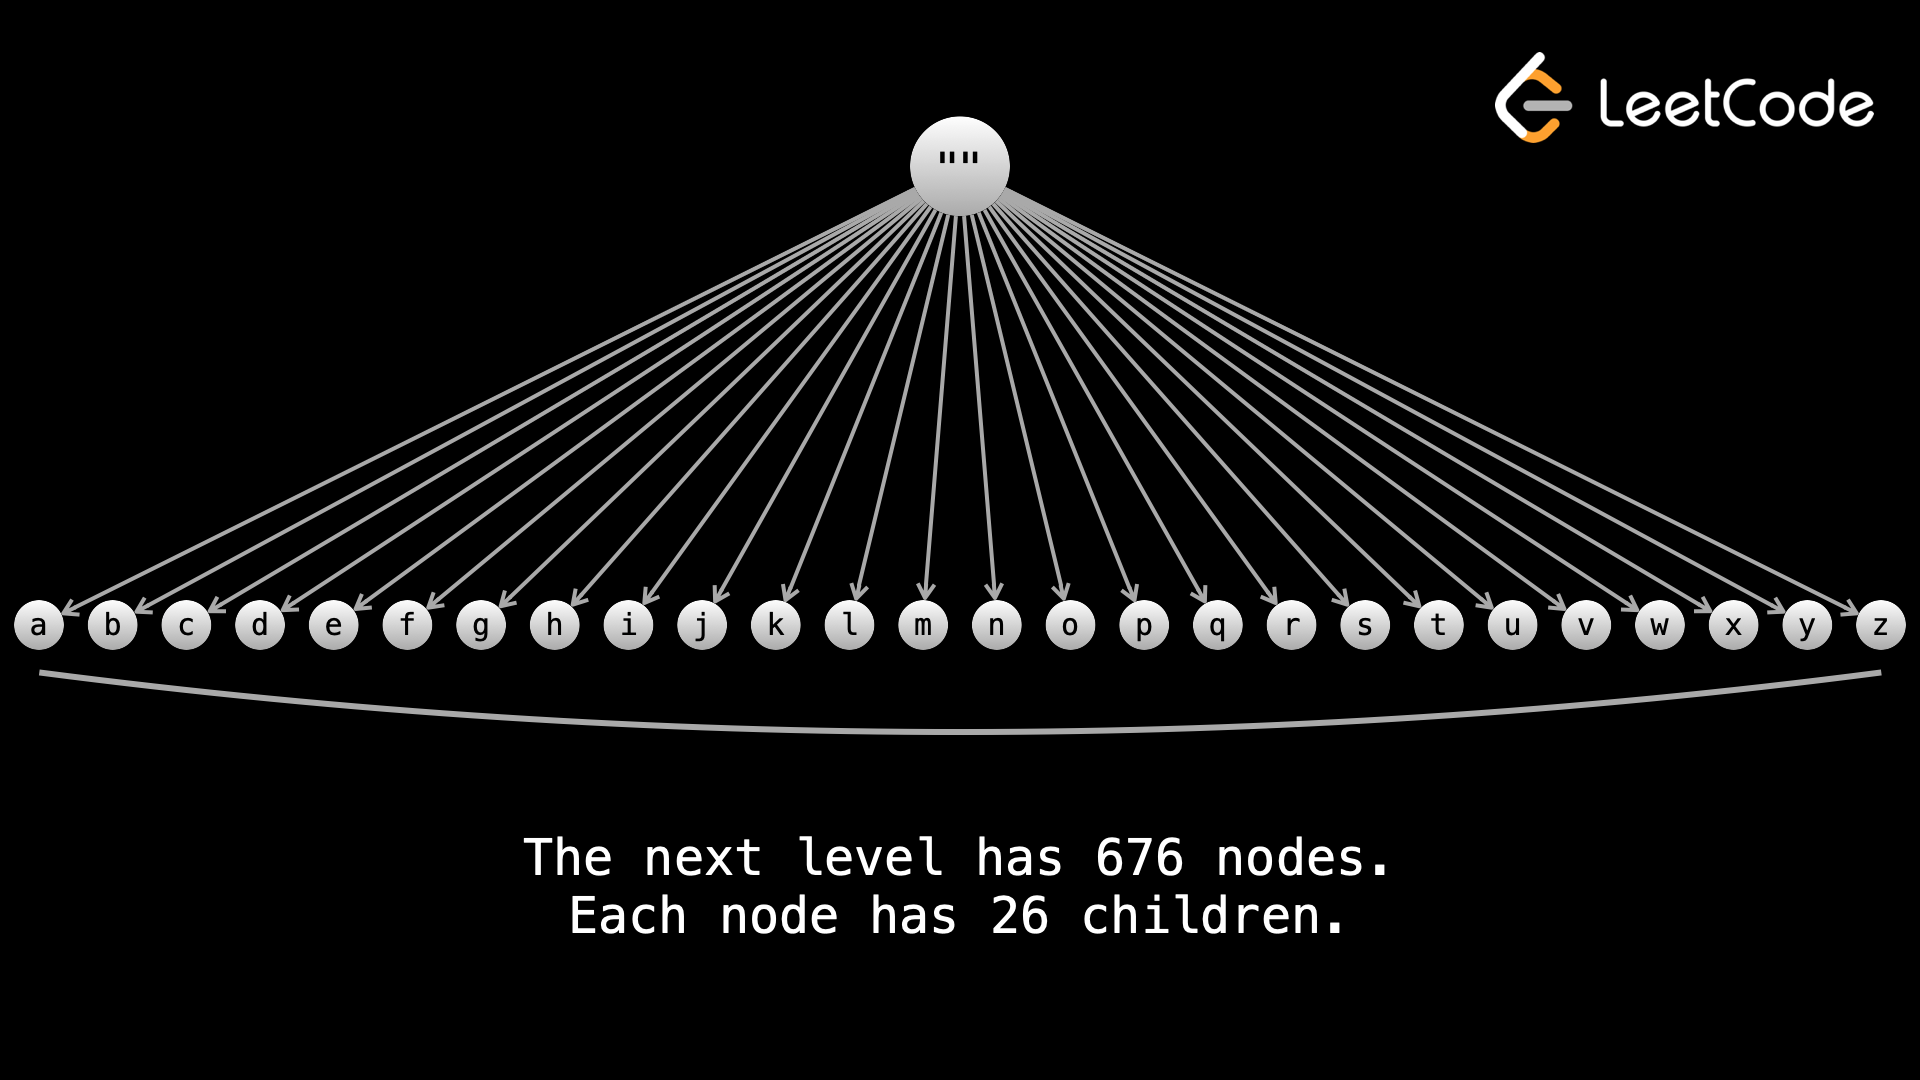

Now, let's say we added a constraint so that instead of all solutions of length n, we only want ones that meet the constraint. An exhaustive search would still generate all strings of length n as "candidates", and then check each one for the constraint. This would have a time complexity ofO(k⋅26^n), where k is the work it costs to check if a string meets the constraint. This time complexity is ridiculously slow.

**Backtracking** is an optimization that involves abandoning a "path" once it is determined that the path cannot lead to a solution. The idea is similar to binary search trees - if you're looking for a value x, and the root node has a value greater than x, then you know you can ignore the entire right subtree. Because the number of nodes in each subtree is exponential relative to the depth, backtracking can save huge amounts of computation. Imagine if the constraint was that the string could only have vowels - an exhaustive search would still generate all 26^n  strings, and then check each one for if it only had vowels. With backtracking, we discard all subtrees that have non-vowels, improving fromO(26^n) candidates toO(5^n).

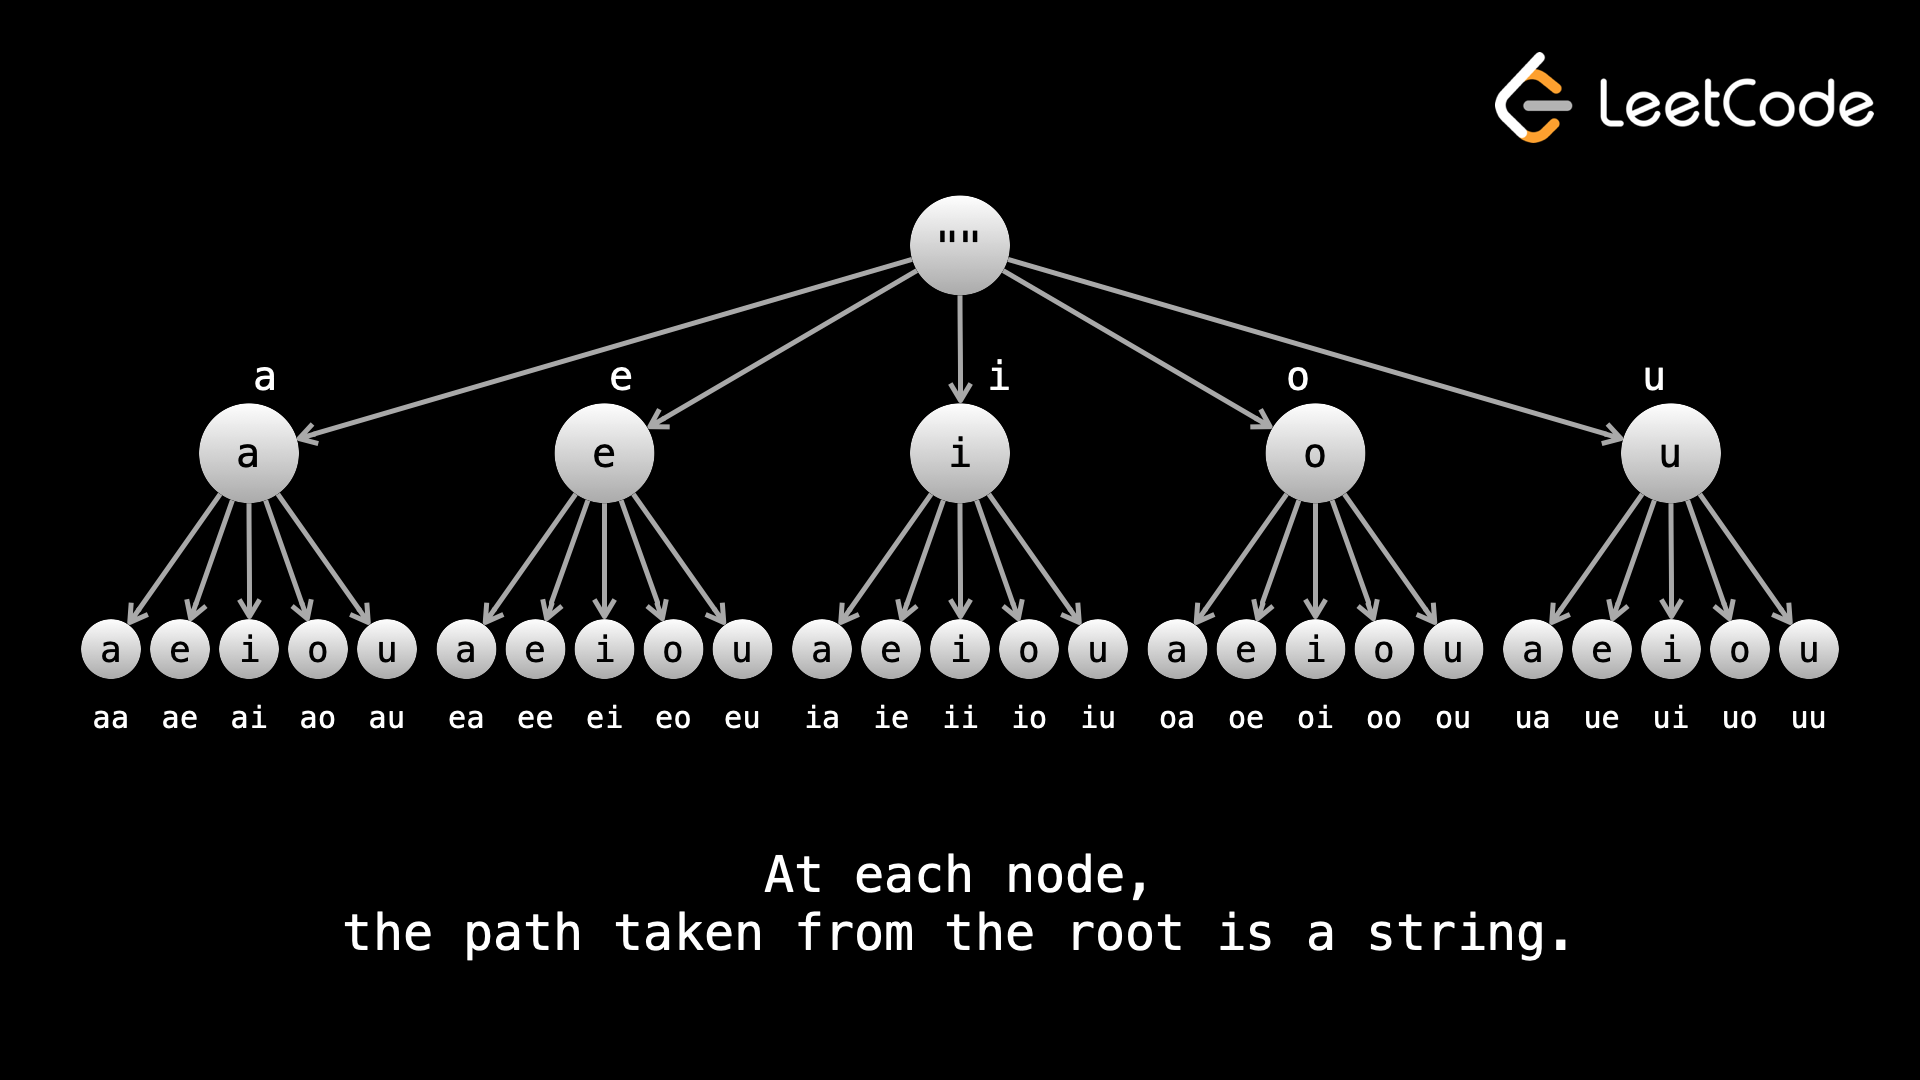

    Abandoning a path is also sometimes called "pruning".

    To summarize the difference between exhaustive search and backtracking:

    In an exhaustive search, we generate all possibilities and then check them for solutions. In backtracking, we prune paths that cannot lead to a solution, generating far fewer possibilities.

Backtracking is a great tool whenever a problem wants you to **find all of something, or there isn't a clear way to find a solution without checking all logical possibilities**. On LeetCode, a strong hint that you should use backtracking is if the input constraints are very small **(n <= ~15)**, as backtracking algorithms usually have exponential time complexities.

**Implementation**

Backtracking is almost always implemented with recursion - it really doesn't make sense to do it iteratively. In most backtracking problems, you will be building something, either directly (like modifying an array) or indirectly (using variables to represent some state). Here is some pseudocode for a general backtracking format:

    // let curr represent the thing you are building
    // it could be an array or a combination of variables

    function backtrack(curr) {
        if (base case) {
            Increment or add to answer
            return
        }

        for (iterate over input) {
            Modify curr
            backtrack(curr)
            Undo whatever modification was done to curr
        }
    }

Let's think back to the analogy of possibilities being represented by a tree.

Each call to the function backtrack represents a node in the tree. Each iteration in the for loop represents a child of the current node, and calling backtrack in that loop represents moving to a child.

The line where you undo the modifications is the "backtracking" step and is equivalent to moving back up the tree from a child to its parent.

At any given node, the path from the root to the node represents a candidate that is being built. The leaf nodes are complete solutions and represent when the base case is reached. The root of this tree is an empty candidate and represents the scope that the original backtrack call is being made from.

In this chapter, we will use trees to represent the backtracking process, as it is a very intuitive way to think about these problems.

If this tree analogy is confusing; don't worry. The video walkthroughs in the upcoming example problems should make things much clearer.

# Generation

One common type of problem that can be solved with backtracking are problems that ask you to generate all of something.

Example 1: 46. Permutations

Given an array nums of distinct integers, return all the possible permutations in any order.

For example, given nums = [1, 2, 3], return [[1,2,3],[1,3,2],[2,1,3],[2,3,1],[3,1,2],[3,2,1]].